In [298]:
## Importing libraries I need 
import numpy as np
import pandas as pd
  
#Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

#To plot the graph embedded in the notebook
%matplotlib inline

#imports from sklearn library
from sklearn import datasets
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler,PolynomialFeatures,LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.svm import LinearSVR, SVR, NuSVR
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error,r2_score

from sklearn.ensemble import  RandomForestRegressor,IsolationForest


import warnings
warnings.filterwarnings(action="ignore")

In [299]:
df = pd.read_csv('https://raw.githubusercontent.com/satishgunjal/House-Price-Prediction-Project/master/Bengaluru_House_Data.csv')
df.head(2)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00


In [287]:
df.area_type.value_counts()
# df.availability.value_counts()
# df.location.value_counts()
# df.size.value_counts()
# df.society.value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [302]:
# Function to detect house prices that are not numerical - as we can see in the data types above.   
def isfloat(x):
    try:
        float(x)
    except:
        return False
    return True

df[~df['total_sqft'].apply(isfloat)].head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
30,Super built-up Area,19-Dec,Yelahanka,4 BHK,LedorSa,2100 - 2850,4.0,0.0,186.000
56,Built-up Area,20-Feb,Devanahalli,4 Bedroom,BrereAt,3010 - 3410,NaN,NaN,192.000
81,Built-up Area,18-Oct,Hennur Road,4 Bedroom,Gollela,2957 - 3450,NaN,NaN,224.500
122,Super built-up Area,18-Mar,Hebbal,4 BHK,SNontle,3067 - 8156,4.0,0.0,477.000
137,Super built-up Area,19-Mar,8th Phase JP Nagar,2 BHK,Vaarech,1042 - 1105,2.0,0.0,54.005
165,Super built-up Area,18-Dec,Sarjapur,2 BHK,Kinuerg,1145 - 1340,2.0,0.0,43.490
188,Super built-up Area,Ready To Move,KR Puram,2 BHK,MCvarar,1015 - 1540,2.0,0.0,56.800
224,Super built-up Area,19-Dec,Devanahalli,3 BHK,Jurdsig,1520 - 1740,NaN,NaN,74.820
410,Super built-up Area,Ready To Move,Kengeri,1 BHK,NaN,34.46Sq. Meter,1.0,0.0,18.500
549,Super built-up Area,18-Sep,Hennur Road,2 BHK,Shxorm,1195 - 1440,2.0,0.0,63.770


In [303]:
# convert to float the resultant data
df1=df[df['total_sqft'].apply(isfloat)]

Text(0.5, 1.0, 'Missing Values Heatmap')

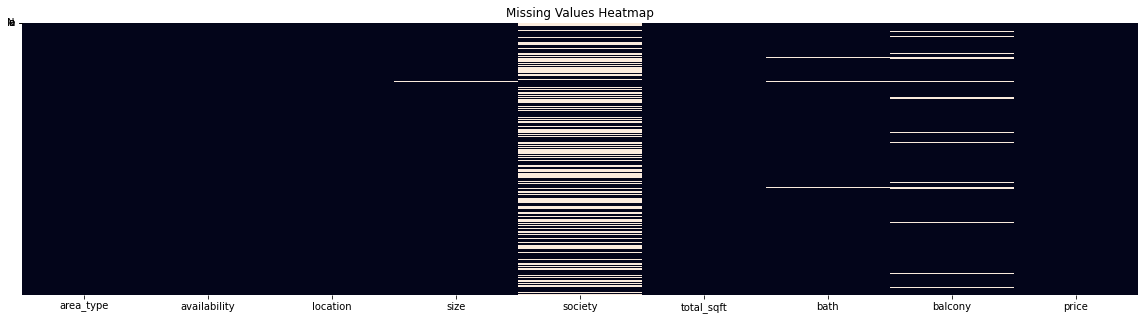

In [304]:
## check deeply for missingness 
plt.figure(figsize=(20,5))

sns.heatmap(df.isnull(), yticklabels="None", cbar=False)
plt.title("Missing Values Heatmap")

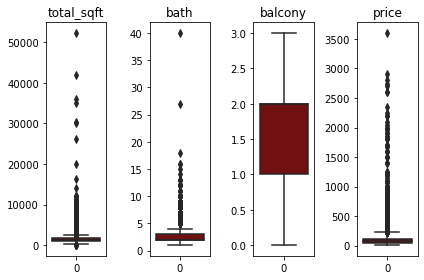

In [305]:
## explore outliers 
cols_to_plot = ['total_sqft','bath','balcony','price']


# Create the figure and two subplots
fig, axes = plt.subplots(ncols=len(cols_to_plot))
for i,j in zip(cols_to_plot,axes): 
    sns.boxplot(data=df1[i],ax=j,color="Maroon")
    j.set_title(i)


plt.tight_layout()


In [314]:
# df1['size'].unique()
# Using lambda function we can get the BHK numeric value
# df1['bedrooms'] = df1['size'].apply(lambda x: int(x.split(' ')[0]))
df1.drop('society',axis=1,inplace=True)

In [315]:
## Data preprocessing 

# Missingness 
#  Impute missing values in numerical columns with median
numerical_cols = df1.select_dtypes(include=['float64']).columns
df1[numerical_cols] = df1[numerical_cols].fillna(df1[numerical_cols].median())

# Impute missing values in categorical columns with mode
categorical_cols = df1.select_dtypes(include=['object']).columns
df1[categorical_cols] = df1[categorical_cols].fillna(df1[categorical_cols].mode().iloc[0])


In [316]:
# Encoding 
# Drop a row 
filted_index = df1[df1['area_type']==2850].index
df1.drop(filted_index,inplace=True)  

le = LabelEncoder()
cat_encoded = df1[categorical_cols].apply(le.fit_transform)


# combine the two datasets after scaling
df1 = pd.concat([cat_encoded,df1[numerical_cols]],axis=1)

In [317]:
## Data Separation into the X and y matrices
X = df1.drop('price',axis=1)
y =df1['price']

In [318]:
# Scaling 
scaler = RobustScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [319]:
# separate training and test sets 
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3, random_state=40)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(9151, 7) (3922, 7) (9151,) (3922,)


In [320]:
# fitting a simple linear regression model 
model_reg = LinearRegression()
model_reg.fit(X_train,y_train)
y_hat = model_reg.predict(X_test)
r2_score(y_test,y_hat)

0.27129402648456413

In [321]:
# fitting a random forest regression model 
model_reg = RandomForestRegressor(n_estimators=1000)
model_reg.fit(X_train,y_train)
y_hat = model_reg.predict(X_test)
r2_score(y_test,y_hat)

0.5265093166695398

In [322]:
# fitting a lasso  regression model 
model_reg = Ridge(alpha = 1000)
model_reg.fit(X_train,y_train)
y_hat = model_reg.predict(X_test)
r2_score(y_test,y_hat)

0.2710399479953268

In [325]:
# fitting a SVR  regression model 
model_reg = SVR(C = 1000,kernel='rbf',degree=2)
model_reg.fit(X_train,y_train)
y_hat = model_reg.predict(X_test)
r2_score(y_test,y_hat)

0.27587998085343546

In [330]:
# drop outliers - Using an automatic outlier detection
# Read more here https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/
anomalies = IsolationForest(contamination=0.045).fit_predict(X_train)
X_train, y_train = X_train[anomalies!= -1],y_train[anomalies!= -1]
model_reg = RandomForestRegressor()
model_reg.fit(X_train,y_train)
y_hat = model_reg.predict(X_test)
r2_score(y_test,y_hat)

0.1625374778740033